In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.metrics import classification_report


from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#for col in df.columns:
#    print(col, ':', df[col].unique(), "\n")

# Check the distribution of Data

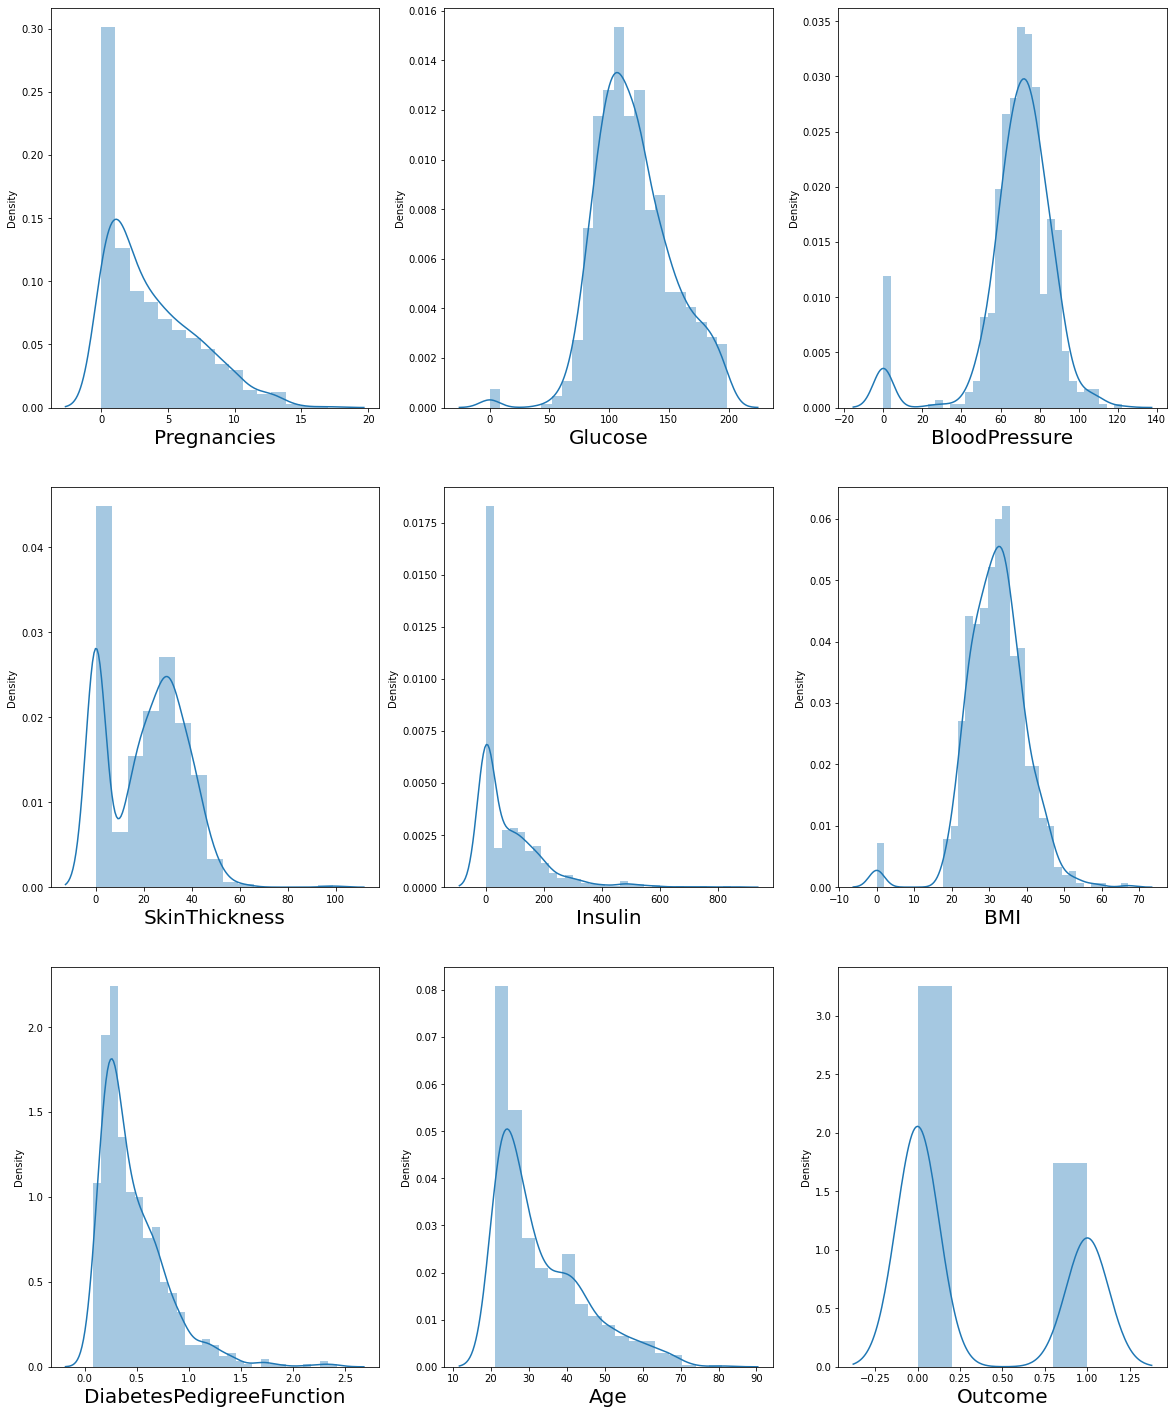

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
colnumber = 1
for col in df:
    if colnumber <=9: # we have 9 col
        ax =plt.subplot(3,3,colnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
    colnumber +=1
plt.show()

As we can see that 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI' columns has zero value. once cannot have '0' values. so those are invalid values.

In [7]:
# rounding preganices,glucose mean value  as in orignal data there is no float value.
df['Pregnancies'] = df['Pregnancies'].replace(0, round(df['Pregnancies'].mean()))
df['Glucose'] = df['Glucose'].replace(0, round(df['Glucose'].mean()))
df['BloodPressure'] = df['BloodPressure'].replace(0, round(df['BloodPressure'].mean()))
df['SkinThickness'] = df['SkinThickness'].replace(0, round(df['SkinThickness'].mean()))
df['Insulin'] = df['Insulin'].replace(0, round(df['Insulin'].mean()))
df['BMI'] = df['BMI'].replace(0, round(df['BMI'].mean(),1))





In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1


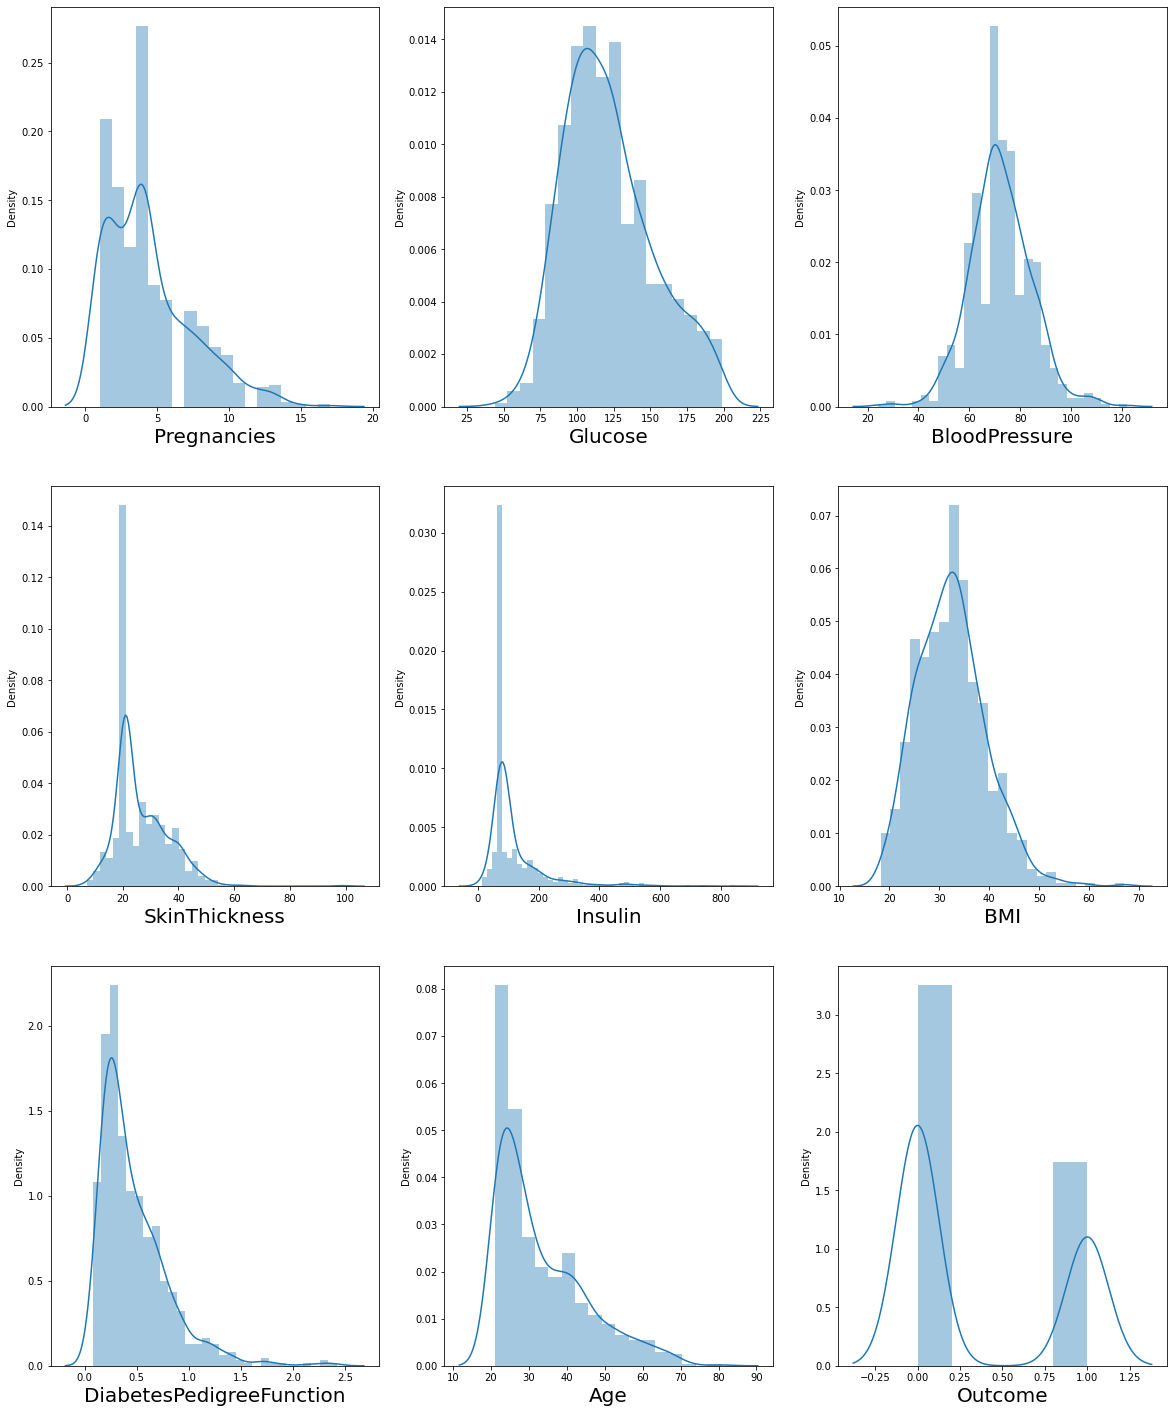

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
colnumber = 1
for col in df:
    if colnumber <=9: # we have 9 col
        ax =plt.subplot(3,3,colnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
    colnumber +=1
plt.show()

# Finding Outlier using Box plot

<AxesSubplot:>

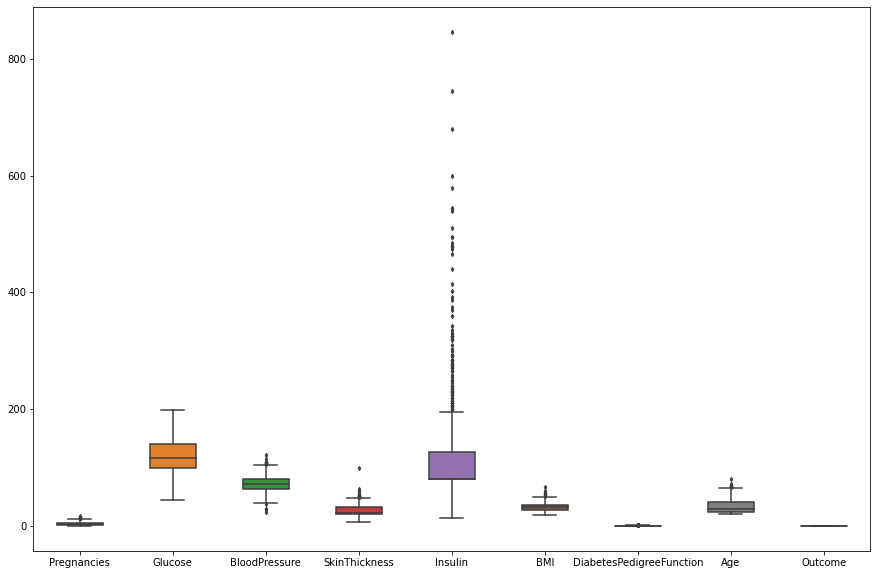

In [102]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data= df, width=0.5, ax=ax, fliersize=3)

In [11]:
# lets reomve outlier using qunatile method

# removing top 2 percent of data
q = df['Pregnancies'].quantile(0.98) 
data_cleaned = df[df['Pregnancies']<q]


#removing 1 % data from blood pressure col
q = data_cleaned['BloodPressure'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['BloodPressure']<q]



#removing 1 % data from skin thickness col
q = data_cleaned['SkinThickness'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

#removing 5 % data from skin insuline col
q = data_cleaned['Insulin'].quantile(0.95) 
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

#removing 1 % data from skin BMI col
q = data_cleaned['BMI'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

#removing 1 % data from skin DiabetesPedigreeFunction col
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

#removing 1 % data from skin DiabetesPedigreeFunction col
q = data_cleaned['Age'].quantile(0.99) 
data_cleaned = data_cleaned[data_cleaned['Age']<q]



as we can see that blodpressure, skinthickness, insulin, bmi ,age has outliers pregnancie, diabetespedegree ahs low outliers

<AxesSubplot:>

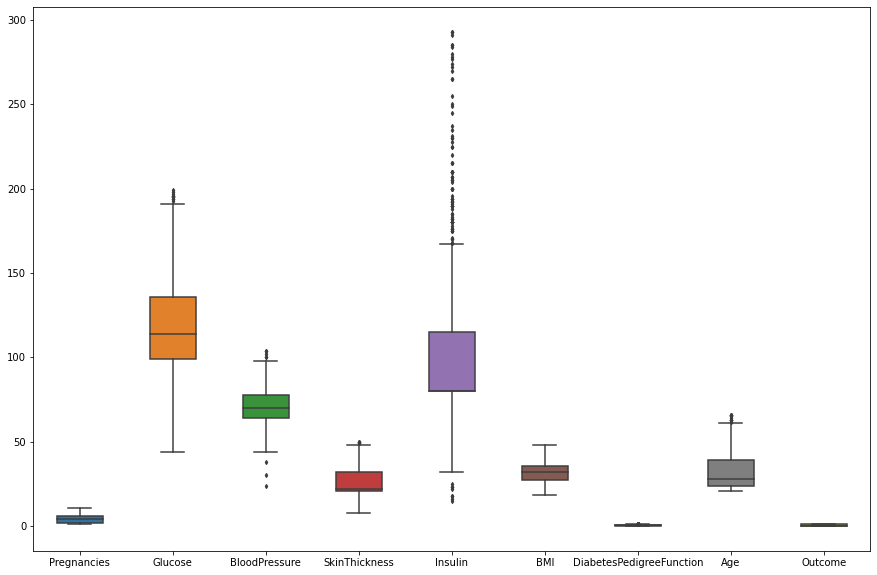

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data= data_cleaned, width=0.5, ax=ax, fliersize=3)

In [15]:
data_cleaned['Insulin'].unique()

array([ 80,  94,  88, 175, 230,  83,  96, 235, 146, 115, 140, 245,  54,
       192, 207,  70,  82,  36,  23, 142, 128,  38, 100,  90, 270,  71,
       125, 176,  48,  64, 228,  76,  40, 152,  18, 135,  37,  51, 145,
       168, 225,  49,  50,  92,  63, 284, 119, 204, 155,  53, 105, 285,
       156,  78, 130,  55,  58, 114, 160, 210,  99,  44, 190, 280,  87,
       129, 120,  56,  32,  45, 194, 150,  67, 116, 278, 122, 220,  75,
        74, 182, 215,  42, 132, 148, 180, 205,  85, 231,  68,  52, 255,
       171,  73, 108,  43, 167, 249, 293,  66, 158,  84,  72,  59, 110,
        81, 196, 165,  61, 170, 277,  60,  95, 237, 191, 250, 265, 193,
        79,  86, 188, 106, 166, 274,  77, 126, 185,  25,  41, 272, 144,
        15, 183,  91,  46, 159, 200,  22, 291, 178, 127,  57,  16, 112],
      dtype=int64)

# Selecting Features and Labels

In [16]:
fea = data_cleaned.drop('Outcome', axis=1)
label = data_cleaned['Outcome']

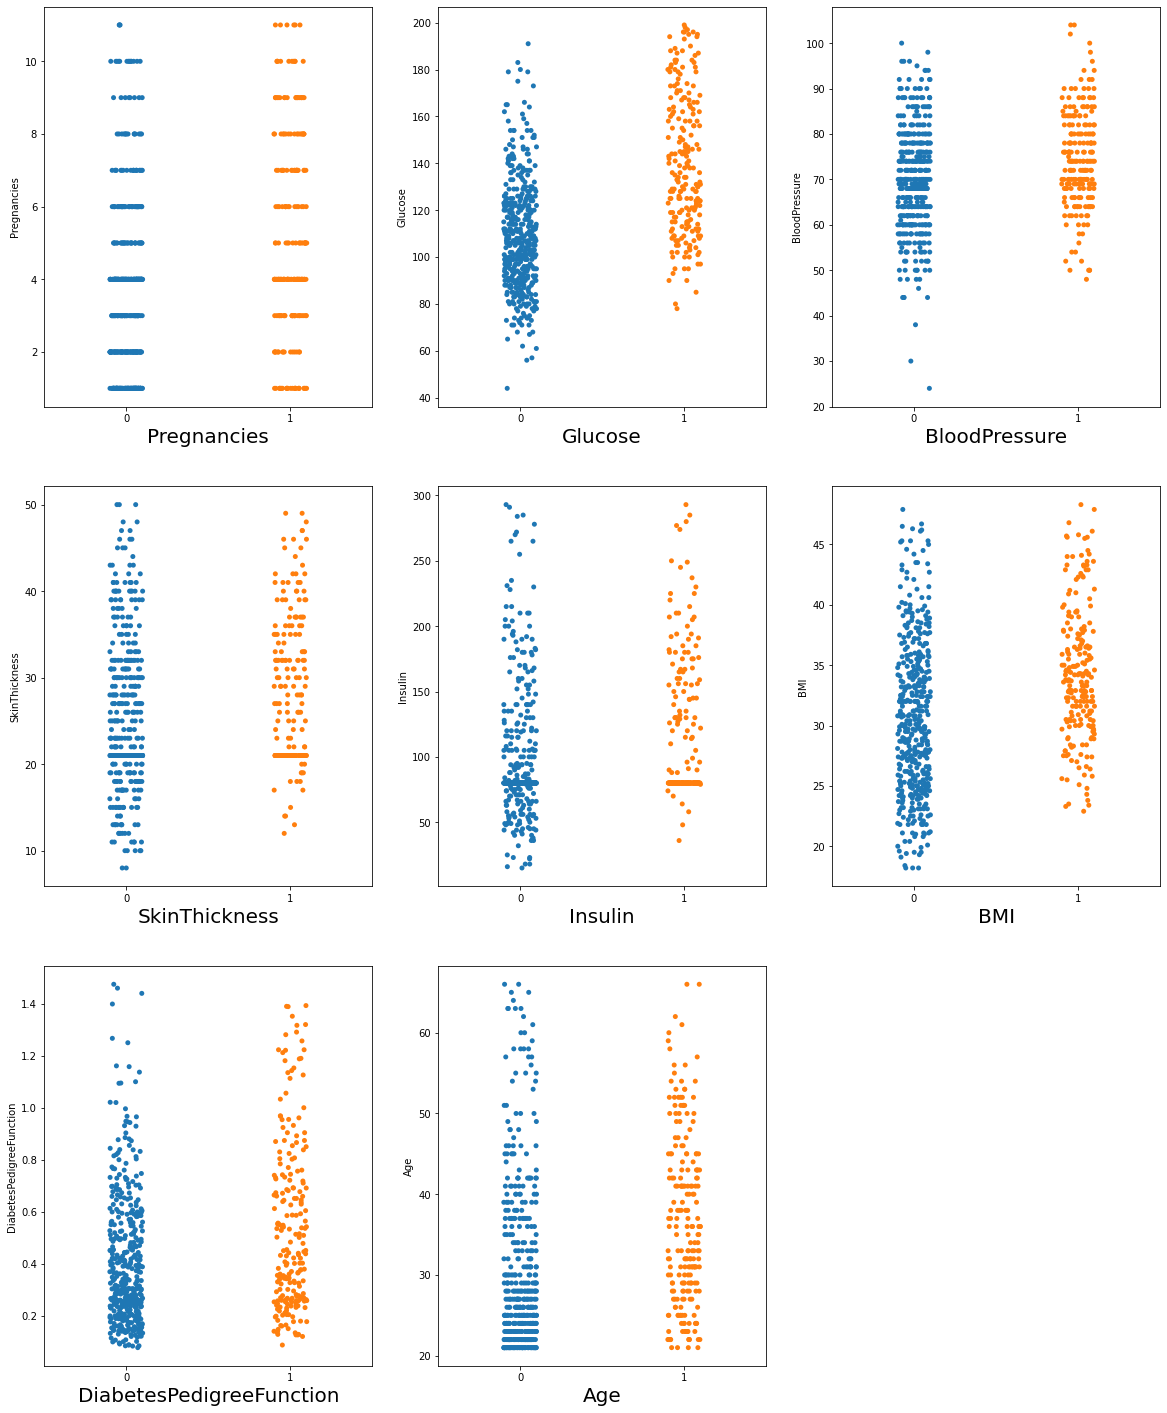

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
colnumber = 1
for col in fea:
    if colnumber <=9: # we have 9 col
        ax =plt.subplot(3,3,colnumber)
        sns.stripplot(label,fea[col])
        plt.xlabel(col, fontsize=20)
    colnumber +=1
plt.show()

# Scaling of Data

In [18]:
scalar = StandardScaler()
xscaled = scalar.fit_transform(fea)

In [19]:
xscaled.shape

(668, 8)

# Checking multicollinearity

In [20]:
vif = pd.DataFrame()
vif['Features'] = fea.columns
vif["vif"] =[variance_inflation_factor(xscaled,i) for i in range(xscaled.shape[1])]


vif

,Features,vif
0,Pregnancies,1.402481
1,Glucose,1.318966
2,BloodPressure,1.247027
3,SkinThickness,1.475149
4,Insulin,1.286526
5,BMI,1.510594
6,DiabetesPedigreeFunction,1.047324
7,Age,1.563237


As we know if vif is more than 5 it has multicollinearity . but we can see we dont have multicollineairty

# Hold out method

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled,label,test_size=0.25)

# KNN model

In [22]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [23]:
knn.score(xtrain,ytrain)

0.8283433133732535

In [24]:
# classification report of train data

y_trainpred = knn.predict(xtrain)
print(confusion_matrix(ytrain,y_trainpred))
print(classification_report(ytrain,y_trainpred))

[[294  40]
 [ 46 121]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       334
           1       0.75      0.72      0.74       167

    accuracy                           0.83       501
   macro avg       0.81      0.80      0.81       501
weighted avg       0.83      0.83      0.83       501



In [25]:
# classification report of test data
y_testpred = knn.predict(xtest)
print(confusion_matrix(ytest,y_testpred))
print(classification_report(ytest,y_testpred))

[[98 20]
 [20 29]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       118
           1       0.59      0.59      0.59        49

    accuracy                           0.76       167
   macro avg       0.71      0.71      0.71       167
weighted avg       0.76      0.76      0.76       167



# Hyperparameter Tuning

In [94]:
paramgrid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : [1,18,20,25,27,30,32,34],
            'n_neighbors' :range(1,15),
             
             
           }

In [95]:
grid = GridSearchCV(KNeighborsClassifier(),paramgrid,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=1;, score=0.743 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=1;, score=0.640 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=1;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=1;, score=0.670 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=1;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=2;, score=0.772 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=2;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=2;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=2;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=2;, score=0.750 total time=   0

[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=4;, score=0.760 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.713 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.860 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.690 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=6;, score=0.782 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=6;, score=0.710 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_

[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=9;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=9;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.840 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.770 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=14;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=14;, score=0.840 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=14;, score=0.690 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=14;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=1;, score=0.743 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=1;, score=0.640 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=1;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=1;, score=0.670 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=1;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=2;, score=0.772 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27

[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=5;, score=0.690 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=5;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.782 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.710 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.820 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.790 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7;, score=0.752 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7;, score=0.680 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_

[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.710 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.870 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11;, score=0.820 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.772 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.750 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.720 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=13;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=2;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=2;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=2;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=2;, score=0.750 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=3;, score=0.752 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=3;, score=0.680 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=3;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=3;, score=0.700 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=3;, score=0.770 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=4;, score=0.723 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=4;, score=0.700 total t

[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=8;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=8;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=8;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=8;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=8;, score=0.780 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0

[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.870 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14;, score=0.782 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14;, score=0.840 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14;, score=0.690 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=1;

[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=2;, score=0.750 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.752 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.680 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.700 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.770 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=4;, score=0.723 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=4;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=4;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=4;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=4;, score=0.

[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8;, score=0.780 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.

[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12;, score=0.720 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.870 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=13;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=14;, score=0.782 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=14;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=14;, score=0.840 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=14

[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=4;, score=0.760 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=5;, score=0.713 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=5;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=5;, score=0.860 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=5;, score=0.690 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=5;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=6;, score=0.782 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=6;, score=0.710 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=6;, score=0.820 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=6;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=6;, score=0.790 total time=   0.0s
[CV 1/5] E

[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.840 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.770 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.710 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.870 total time

[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=1;, score=0.670 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=1;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=2;, score=0.772 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=2;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=2;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=2;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=2;, score=0.750 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.752 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.680 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.700 total time=   0.0s

[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=8;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=8;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=8;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=8;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=8;, score=0.780 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=9;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=9;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=9;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=0.802 total time=   0.0

[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.720 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.802 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.870 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=13;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=14;, score=0.782 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=14;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=14;, score=0.840 total t

[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=2;, score=0.750 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.752 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.680 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.790 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.700 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.770 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=4;, score=0.723 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=4;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=4;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=4;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=4;, score=0.760 total time=   0.0s

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': range(1, 15)},
             verbose=3)

In [96]:
grid.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 11}

In [98]:
print('accuracy of training data')
y3_pred=grid.predict(xtrain)
print(confusion_matrix(ytrain,y3_pred))
print("Accuracy score", accuracy_score(ytrain,y3_pred))
print(classification_report(ytrain,y3_pred))

accuracy of training data
[[306  28]
 [ 62 105]]
Accuracy score 0.8203592814371258
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       334
           1       0.79      0.63      0.70       167

    accuracy                           0.82       501
   macro avg       0.81      0.77      0.79       501
weighted avg       0.82      0.82      0.81       501



Look like accuracy of the training data has decresed , maybe our model was overfitting before. now it look better

In [99]:
print('accuracy of test data')
y3_pred=grid.predict(xtest)
print(confusion_matrix(ytest,y3_pred))
print("Accuracy score", accuracy_score(ytest,y3_pred))
print(classification_report(ytest,y3_pred))

accuracy of test data
[[100  18]
 [ 22  27]]
Accuracy score 0.7604790419161677
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       118
           1       0.60      0.55      0.57        49

    accuracy                           0.76       167
   macro avg       0.71      0.70      0.70       167
weighted avg       0.76      0.76      0.76       167



Our test data score has incresed as compared to before. so our model was overfitting before.


# Import Pickle

In [100]:
import pickle
with open('KnnModelDibetes.sav','wb') as f:
    pickle.dump(grid,f)

In [101]:
with open('Dibetes_Xscaled_scalar', 'wb') as f:
    pickle.dump(scalar,f)